<a href="https://colab.research.google.com/github/EgorGod21/Comparison_detection_models/blob/main/Models/ssd_on_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mxnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [2]:
!pip install gluoncv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00


In [3]:
!pip install torch==1.11.0+cpu torchvision==0.2.2.post2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 627.7 kB/s eta 0:00:00
Reason for being yanked: So that users won't accidentally install this when using python 3.11
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.0+cu121
    Uninstalling torchvision-0.16.0+cu121:
      Successfully uninstalled torchvision-0.16.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.13 requires torchvision>=0.11, but you have torchvision 0.2.2.post2 which is incompatible.
torchaudio 2.1.0+cu121 requires torch

In [1]:
import torch
print(torch.__version__)

1.11.0+cpu


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive

/content/gdrive/MyDrive


In [4]:
from matplotlib import pyplot as plt
from gluoncv import model_zoo, data, utils
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import gluoncv
import numpy as np
import pandas as pd
import seaborn as sns
import time
import os

/usr/local/lib/python3.10/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.1` and `torch==1.11.0+cpu` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


In [5]:
images_path = './TestPhoto'
assert os.path.exists(images_path), f'Папка {images_path} не существует.'

output_ssd_300 = './TestPhoto_SSD_300_CPU'

os.makedirs(output_ssd_300, exist_ok=True)

In [6]:
models = {
    'SSD_300':{
        'model':model_zoo.get_model('ssd_300_vgg16_atrous_coco', pretrained=True),
        'output':output_ssd_300,
        'preprocess':data.transforms.presets.ssd.load_test
        }
    }

100%|██████████| 125080/125080 [00:02<00:00, 42926.47KB/s]


In [7]:
results = []
def process_images(model_name, model_info):
  model = model_info['model']
  output = model_info['output']
  preprocess = model_info['preprocess']

  for image in os.listdir(images_path):
    if os.path.isdir(os.path.join(images_path, image)):
      continue

    image_path = os.path.join(images_path, image)
    x, img = preprocess(image_path, short=512)

    start_time = time.time()
    class_IDs, scores, bounding_boxs = model(x)
    end_time = time.time()

    score_threshold = 0.6

    array_scores = np.concatenate(scores[0].asnumpy())
    array_pred = np.concatenate(class_IDs[0].asnumpy())
    array_bboxes = bounding_boxs[0].asnumpy()

    valid_predictions_mask = array_scores >= score_threshold

    filtered_array_pred  = array_pred[valid_predictions_mask]
    filtered_array_scores = array_scores[valid_predictions_mask]
    filtered_array_bboxes = array_bboxes[valid_predictions_mask]

    ax = utils.viz.plot_bbox(img, filtered_array_bboxes, filtered_array_scores,
                          filtered_array_pred, class_names=model.classes)

    ax.axis('off')
    output_path = os.path.join(output, image)
    plt.savefig(output_path)

    array_classes = np.array(model.classes)

    pred_classes = array_classes[filtered_array_pred.astype(int)]

    result = {
            'Model': model_name,
            'Image': image,
            'Prediction Time': end_time - start_time,
            'Predicted Classes': dict(Counter(pred_classes)),
            'Number of Objects': len(pred_classes)
        }
    results.append(result)
    print(result)

    plt.show()

{'Model': 'SSD_300', 'Image': '1.jpg', 'Prediction Time': 0.03782391548156738, 'Predicted Classes': {'car': 5}, 'Number of Objects': 5}


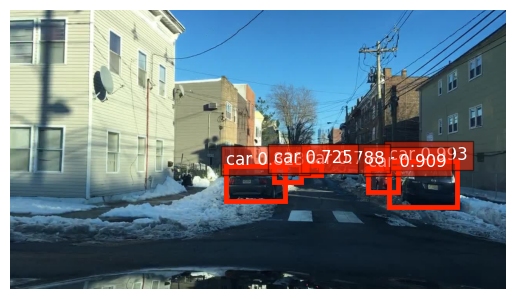

{'Model': 'SSD_300', 'Image': '2.jpg', 'Prediction Time': 0.0648653507232666, 'Predicted Classes': {'car': 1, 'truck': 1}, 'Number of Objects': 2}


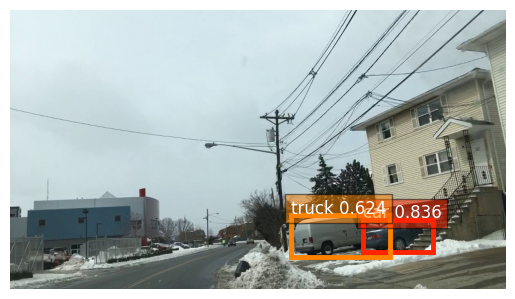

{'Model': 'SSD_300', 'Image': '3.jpg', 'Prediction Time': 0.030666112899780273, 'Predicted Classes': {'car': 3}, 'Number of Objects': 3}


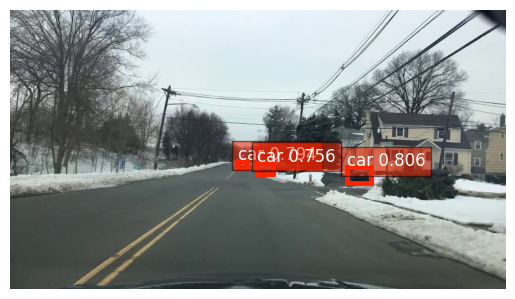

{'Model': 'SSD_300', 'Image': '4.jpg', 'Prediction Time': 0.05980873107910156, 'Predicted Classes': {'car': 4}, 'Number of Objects': 4}


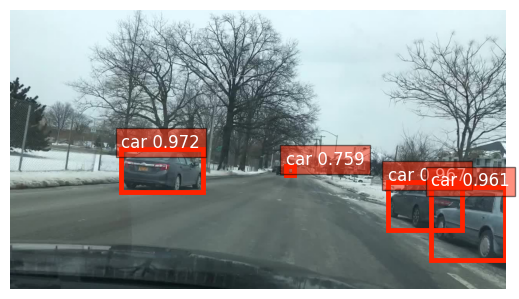

{'Model': 'SSD_300', 'Image': '5.jpg', 'Prediction Time': 0.029925823211669922, 'Predicted Classes': {'truck': 3, 'car': 4}, 'Number of Objects': 7}


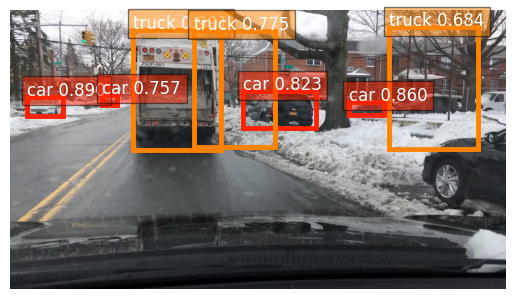

{'Model': 'SSD_300', 'Image': '12.jpg', 'Prediction Time': 0.04781079292297363, 'Predicted Classes': {'car': 9}, 'Number of Objects': 9}


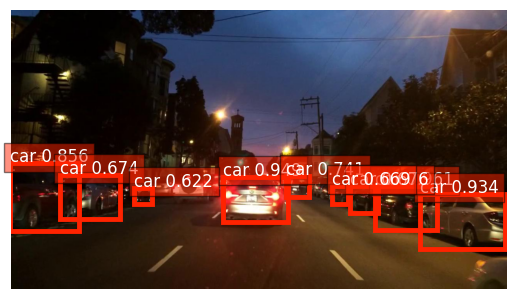

{'Model': 'SSD_300', 'Image': '6.jpg', 'Prediction Time': 0.028655052185058594, 'Predicted Classes': {'car': 5, 'train': 1}, 'Number of Objects': 6}


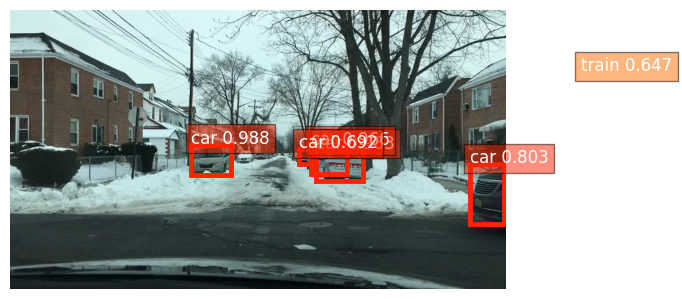

{'Model': 'SSD_300', 'Image': '13.jpg', 'Prediction Time': 0.07724356651306152, 'Predicted Classes': {'car': 7}, 'Number of Objects': 7}


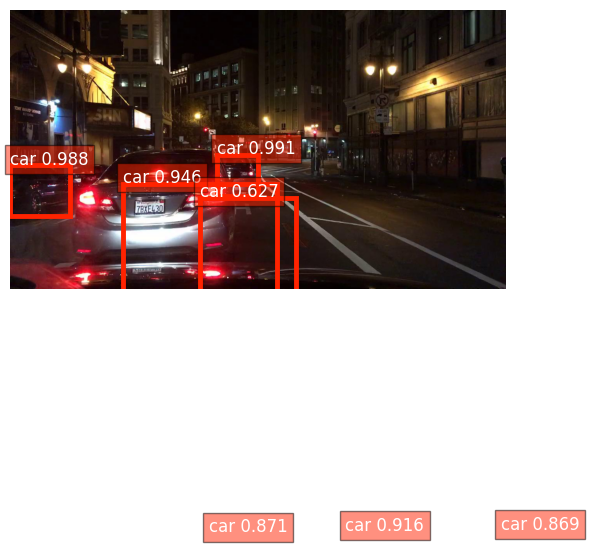

{'Model': 'SSD_300', 'Image': '14.jpg', 'Prediction Time': 0.03004932403564453, 'Predicted Classes': {'car': 6}, 'Number of Objects': 6}


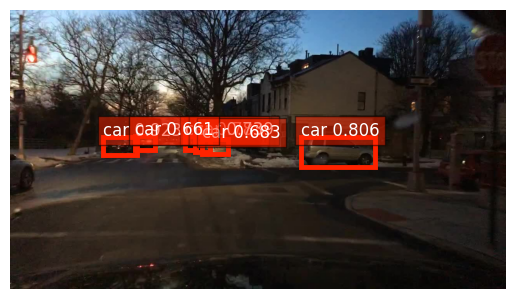

{'Model': 'SSD_300', 'Image': '15.jpg', 'Prediction Time': 0.06507730484008789, 'Predicted Classes': {'car': 6}, 'Number of Objects': 6}


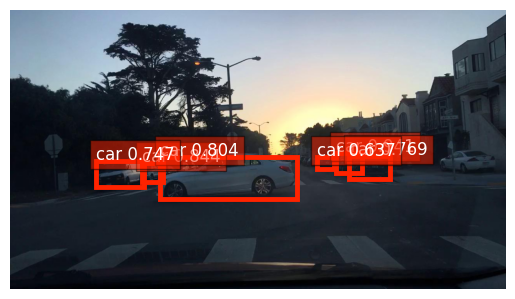

{'Model': 'SSD_300', 'Image': '7.jpg', 'Prediction Time': 0.04061746597290039, 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


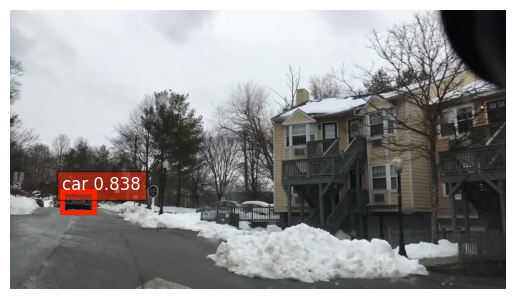

{'Model': 'SSD_300', 'Image': '8.jpg', 'Prediction Time': 0.053460121154785156, 'Predicted Classes': {'stop sign': 1, 'car': 1}, 'Number of Objects': 2}


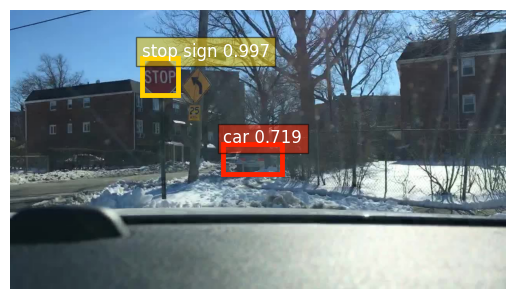

{'Model': 'SSD_300', 'Image': '9.jpg', 'Prediction Time': 0.03189706802368164, 'Predicted Classes': {'person': 4, 'car': 8, 'truck': 1, 'traffic light': 1}, 'Number of Objects': 14}


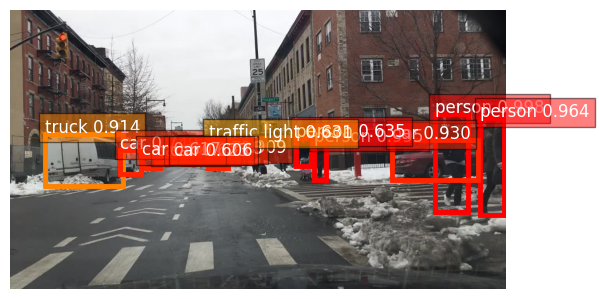

{'Model': 'SSD_300', 'Image': '16.jpg', 'Prediction Time': 0.029683351516723633, 'Predicted Classes': {'car': 13}, 'Number of Objects': 13}


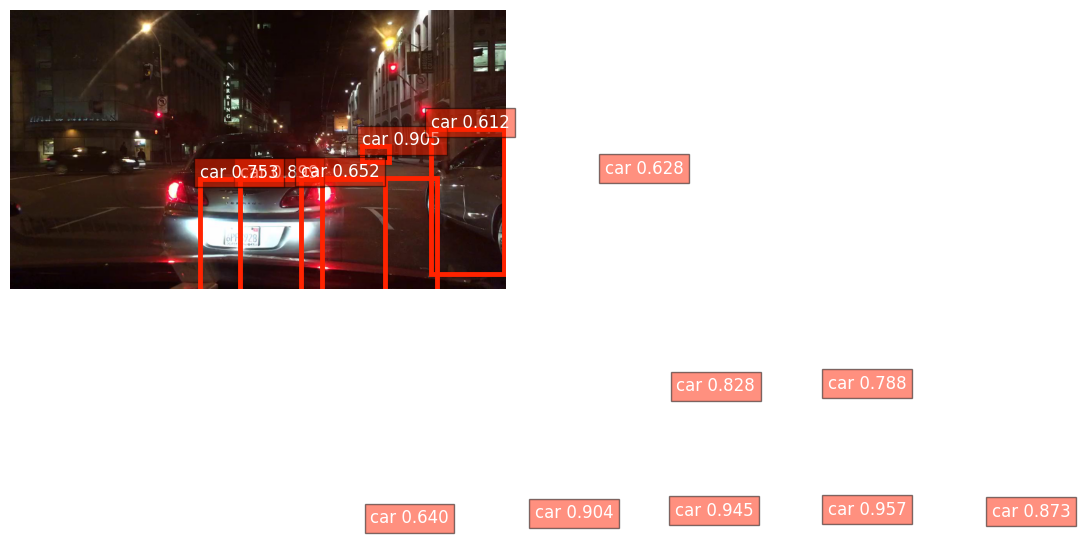

{'Model': 'SSD_300', 'Image': '17.jpg', 'Prediction Time': 0.02950453758239746, 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


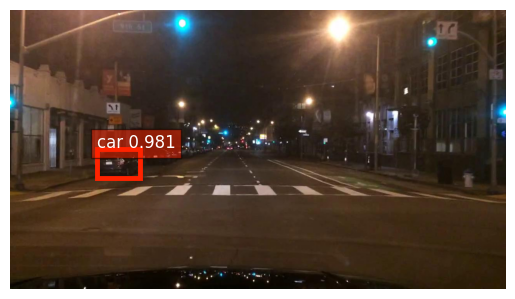

{'Model': 'SSD_300', 'Image': '10.jpg', 'Prediction Time': 0.03048539161682129, 'Predicted Classes': {'car': 7, 'traffic light': 1}, 'Number of Objects': 8}


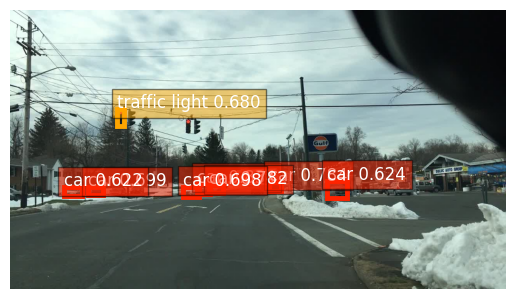

{'Model': 'SSD_300', 'Image': '18.jpg', 'Prediction Time': 0.031391143798828125, 'Predicted Classes': {'car': 5, 'truck': 1}, 'Number of Objects': 6}


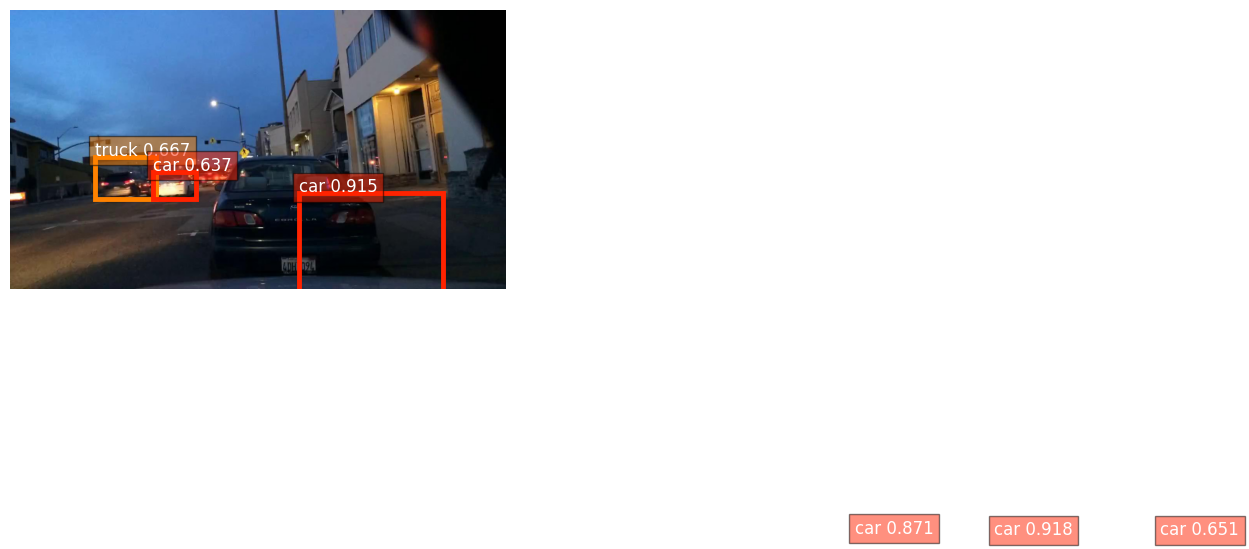

{'Model': 'SSD_300', 'Image': '19.jpg', 'Prediction Time': 0.061441659927368164, 'Predicted Classes': {'car': 2, 'tv': 1}, 'Number of Objects': 3}


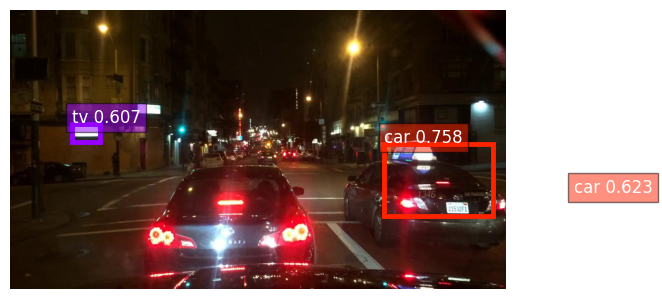

{'Model': 'SSD_300', 'Image': '20.jpg', 'Prediction Time': 0.030504465103149414, 'Predicted Classes': {'car': 3}, 'Number of Objects': 3}


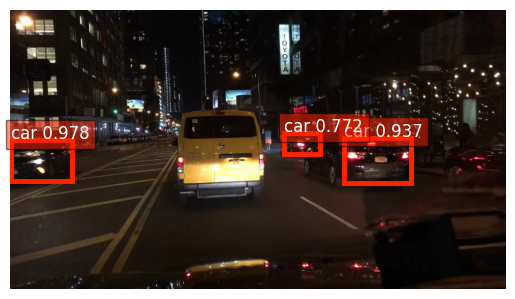

{'Model': 'SSD_300', 'Image': '11.jpg', 'Prediction Time': 0.05805635452270508, 'Predicted Classes': {'car': 4}, 'Number of Objects': 4}


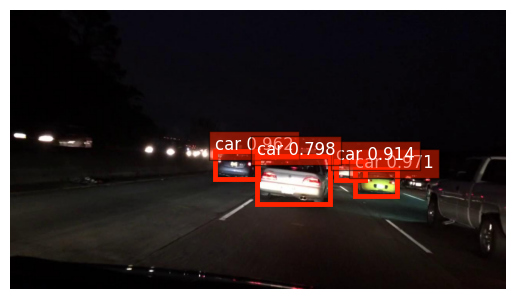

{'Model': 'SSD_300', 'Image': '21.jpg', 'Prediction Time': 0.039965152740478516, 'Predicted Classes': {'car': 12}, 'Number of Objects': 12}


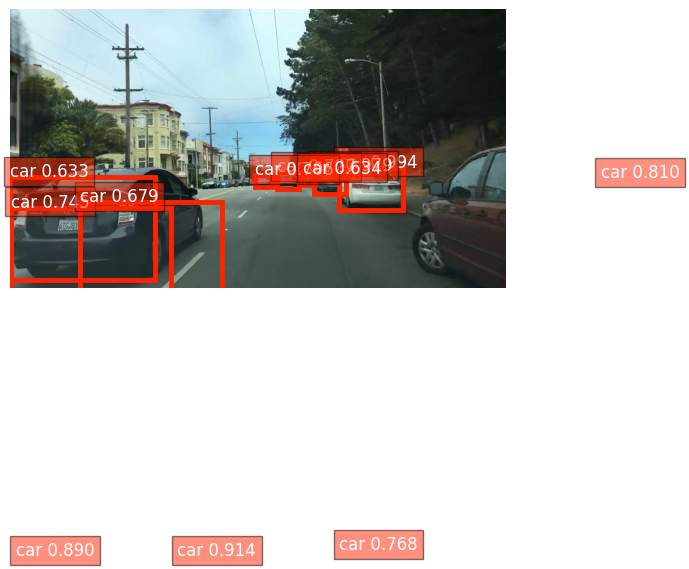

{'Model': 'SSD_300', 'Image': '22.jpg', 'Prediction Time': 0.07825398445129395, 'Predicted Classes': {'car': 7}, 'Number of Objects': 7}


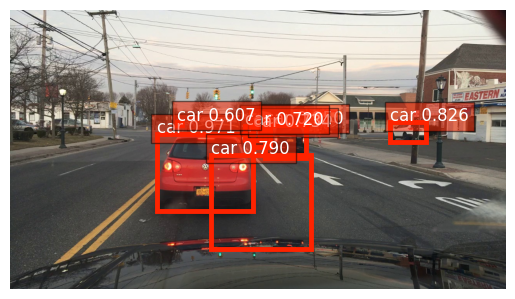

{'Model': 'SSD_300', 'Image': '23.jpg', 'Prediction Time': 0.032765865325927734, 'Predicted Classes': {'car': 7, 'person': 5, 'bicycle': 1, 'bus': 1}, 'Number of Objects': 14}


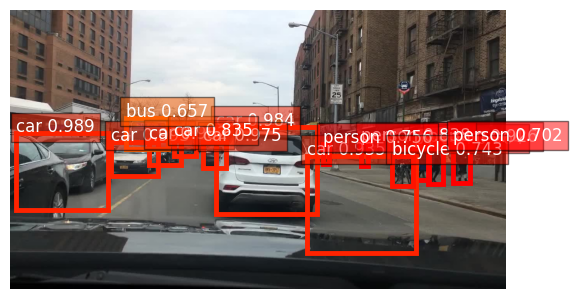

{'Model': 'SSD_300', 'Image': '24.jpg', 'Prediction Time': 0.048346519470214844, 'Predicted Classes': {'car': 7, 'truck': 1, 'traffic light': 1}, 'Number of Objects': 9}


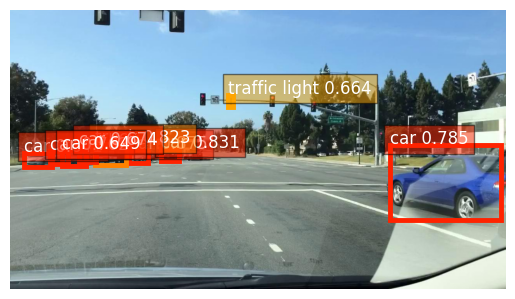

{'Model': 'SSD_300', 'Image': '25.jpg', 'Prediction Time': 0.02916550636291504, 'Predicted Classes': {'person': 2, 'car': 5}, 'Number of Objects': 7}


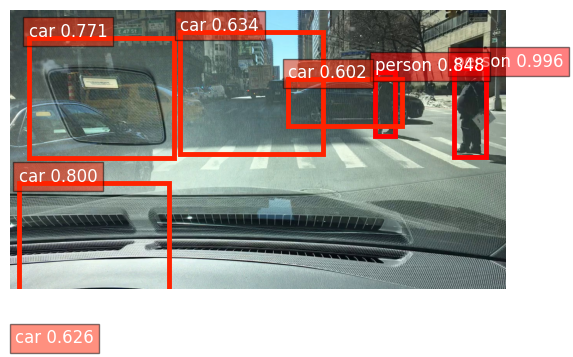

{'Model': 'SSD_300', 'Image': '26.jpg', 'Prediction Time': 0.03973889350891113, 'Predicted Classes': {'car': 3}, 'Number of Objects': 3}


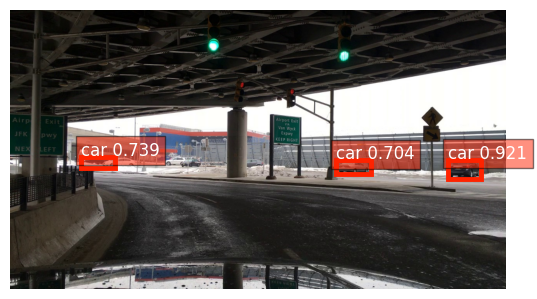

{'Model': 'SSD_300', 'Image': '27.jpg', 'Prediction Time': 0.028609037399291992, 'Predicted Classes': {'car': 12}, 'Number of Objects': 12}


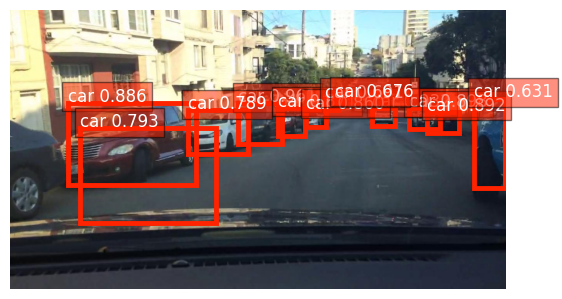

{'Model': 'SSD_300', 'Image': '28.jpg', 'Prediction Time': 0.030121564865112305, 'Predicted Classes': {'car': 10}, 'Number of Objects': 10}


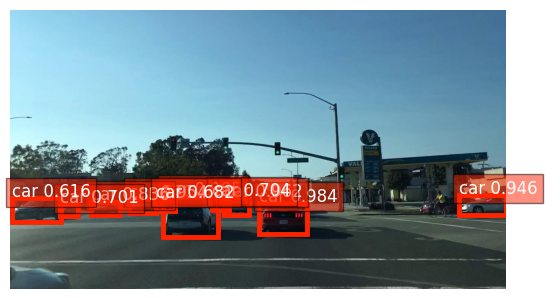

{'Model': 'SSD_300', 'Image': '29.jpg', 'Prediction Time': 0.033127784729003906, 'Predicted Classes': {'car': 6, 'person': 1}, 'Number of Objects': 7}


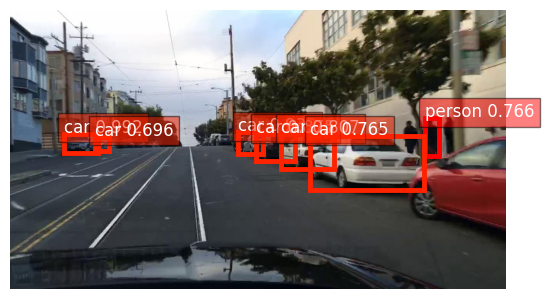

{'Model': 'SSD_300', 'Image': '30.jpg', 'Prediction Time': 0.02701091766357422, 'Predicted Classes': {'truck': 3, 'car': 1, 'person': 1}, 'Number of Objects': 5}


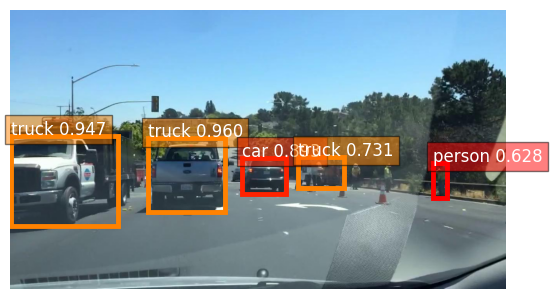

{'Model': 'SSD_300', 'Image': '32.jpg', 'Prediction Time': 0.029277324676513672, 'Predicted Classes': {'truck': 1, 'car': 4}, 'Number of Objects': 5}


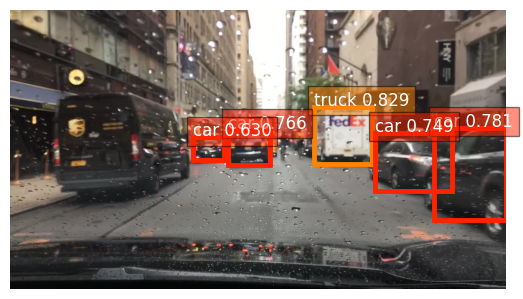

{'Model': 'SSD_300', 'Image': '31.jpg', 'Prediction Time': 0.04863452911376953, 'Predicted Classes': {'car': 1}, 'Number of Objects': 1}


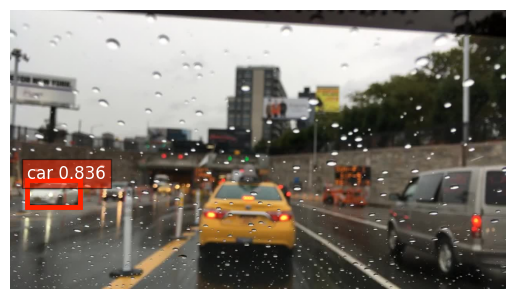

{'Model': 'SSD_300', 'Image': '33.jpg', 'Prediction Time': 0.030517578125, 'Predicted Classes': {'car': 3}, 'Number of Objects': 3}


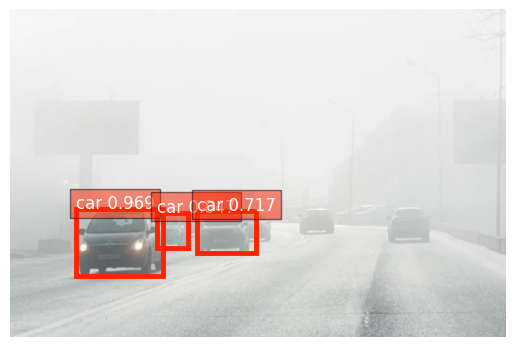

In [8]:
process_images('SSD_300', models['SSD_300'])

In [ ]:
df = pd.DataFrame(results)
df['Image_numeric'] = df['Image'].str.extract('(\d+)').astype(float)
df = df.sort_values(by='Image_numeric', ascending=True).reset_index(drop=True)
df = df.drop('Image_numeric', axis=1)

In [ ]:
df

Model   Image  Prediction Time                 Predicted Classes  \
0      YOLO   1.jpg         0.046806                        {'car': 4}   
1   SSD_300   1.jpg         0.076567                        {'car': 5}   
2      YOLO   2.jpg         0.050104            {'car': 3, 'truck': 1}   
3   SSD_300   2.jpg         0.069927            {'car': 1, 'truck': 1}   
4      YOLO   3.jpg         0.085152     {'car': 4, 'fire hydrant': 1}   
..      ...     ...              ...                               ...   
61  SSD_300  31.jpg         0.046120                        {'car': 1}   
62     YOLO  32.jpg         0.045686  {'car': 4, 'truck': 1, 'bus': 1}   
63  SSD_300  32.jpg         0.056975            {'truck': 1, 'car': 4}   
64     YOLO  33.jpg         0.090206                        {'car': 6}   
65  SSD_300  33.jpg         0.080332                        {'car': 3}   

    Number of Objects  
0                   4  
1                   5  
2                   4  
3                   2  
4                   5  
..                ...  
61                  1  
62                  6  
63                  5  
64                  6  
65                  3  

[66 rows x 5 columns]

In [ ]:
df.to_csv('models_info.csv', index=False)

In [ ]:
df = pd.read_csv('models_info.csv')

In [ ]:
df.groupby(['Model']).agg({'Number of Objects':'mean'})

Number of Objects
Model                     
SSD_300           6.212121
YOLO              7.212121

In [ ]:
df.groupby(['Model']).agg({'Prediction Time':'mean'})

Prediction Time
Model                   
SSD_300         0.063911
YOLO            0.071013